# Exercício 9 - K-MER
Sequências de péptidos:

In [1]:
# imports
from sklearn.preprocessing import StandardScaler
from si.io_package.csv_file import read_csv
from si.feature_extraction.k_mer import KMer
from si.model_selection.split import train_test_split
from si.linear_model.logistic_regression import LogisticRegression

In [2]:
filename_transporter = "C:/Users/Ana/Documents/GitHub/mbioinf-sib/datasets/transporters.csv"
transporter = read_csv(filename_transporter, features=True, label=True)
transporter.print_dataframe()

,Sequence
1,MKKTLIALSVSAAAMATGVNAAELYNQDGTSLEMGGRAEARLSMKD...
0,MRIGVYVCHCGLNIAGVIDVSALEEMAGELEDVVLAREVQFLCSDS...
1,MELKNKKLSLWEAVSMAVGVMIGASIFSIFGVGAKIAGRNLPETFI...
0,MHLPSLSVALALVSSSLALPQAVLPENDVSSRAAAVKEAFSHAWDG...
0,MEELVGLREGFSGDPVTLQELWGPCPHIRRAIQGGLEWLKQKVFRL...
...,...
0,MKIKDALIKAYSVLKETNDEFYMEDSQILLSYVLKKDRIFLITNRE...
1,MSIATIVPENAVIGQAVNIRSMETDIVSLDDRLLQAFSGSAIATAV...
1,MTAYIQRSQCISTSLLVVLTTLVSCQIPRDRLSNIGVIVDEGKSLK...
1,MTEASEINLSDIKGPIDVNTPITNHRTALIQNYSTKPKLTYQTVFG...


In [3]:
k_mer = KMer(k=3, alphabet='PROT')
kmer_dataset = k_mer.fit_transform(transporter)

In [4]:
kmer_dataset.print_dataframe()

,AAA,AAC,AAD,AAE,AAF,AAG,AAH,AAI,AAK,AAL,...,__N,__P,__Q,__R,__S,__T,__V,__W,__Y,___
1,0.002967,0.000000,0.002967,0.002967,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0,0.000000,0.002522,0.000000,0.002522,0.000000,0.001261,0.0,0.000000,0.000000,0.002522,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.002299,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0,0.006085,0.000000,0.002028,0.004057,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0,0.004367,0.000000,0.000000,0.000000,0.001456,0.000000,0.0,0.001456,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.001770,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.000000,0.000000,0.001996,0.000000,0.001996,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
kmer_dataset.x = StandardScaler().fit_transform(kmer_dataset.X)

In [7]:
train, test = train_test_split(kmer_dataset)

In [12]:
lg_model = LogisticRegression(max_iter=2000)
lg_model.fit(train)
lg_model.score(test)

0.48507462686567165

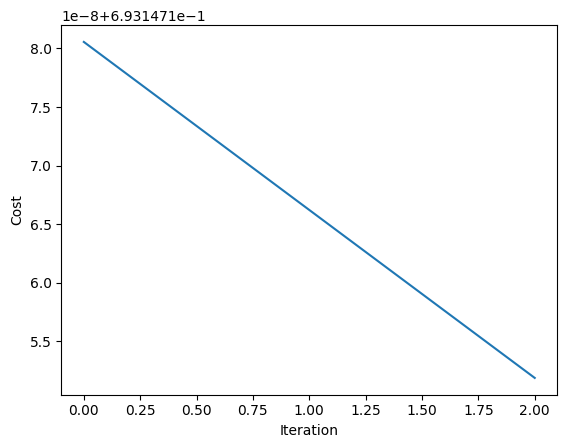

In [11]:
lg_model.plot_cost_history()

Composição nucleotídica em scripts/lecture_scripts/test_kmer.ipynb